In [1]:
pwd

'/sciproc/disk03/fiona/Kepler-17'

In [1]:
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
from astroquery.mast import Observations
import pandas as pd
import astropy.io.fits as pyfits
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy import stats
import random

In [3]:
obs_table = Observations.query_object("Kepler17",radius="0 deg")

In [4]:
dataProductsByObservation = Observations.get_product_list(obs_table[obs_table['obs_collection']=='Kepler'])

In [5]:
# choose data which tail-name is .llc or .slc
tot = 0 #迴圈跑的次數; in range():不要全部跑完，可設定跑的次數
fits_file_sc = []
for a,s in enumerate(dataProductsByObservation['productFilename']):
    if  'kplr' in s and 'slc.fits' in s: # 在s中，同時有'kplr'跟'llc.fits'的條件下
        fits_file_sc.append(s)
        print(a,s)
        tot+=1
print(tot)

39 kplr010619192-2010019161129_slc.fits
40 kplr010619192-2010049094358_slc.fits
41 kplr010619192-2010078100744_slc.fits
42 kplr010619192-2010111051353_slc.fits
43 kplr010619192-2010140023957_slc.fits
44 kplr010619192-2010174090439_slc.fits
45 kplr010619192-2010203174610_slc.fits
46 kplr010619192-2010234115140_slc.fits
47 kplr010619192-2010265121752_slc.fits
48 kplr010619192-2011024051157_slc.fits
49 kplr010619192-2011053090032_slc.fits
50 kplr010619192-2011073133259_slc.fits
51 kplr010619192-2011116030358_slc.fits
52 kplr010619192-2011145075126_slc.fits
53 kplr010619192-2011177032512_slc.fits
54 kplr010619192-2011208035123_slc.fits
55 kplr010619192-2011240104155_slc.fits
56 kplr010619192-2011271113734_slc.fits
57 kplr010619192-2012032013838_slc.fits
58 kplr010619192-2012060035710_slc.fits
59 kplr010619192-2012088054726_slc.fits
60 kplr010619192-2012121044856_slc.fits
61 kplr010619192-2012151031540_slc.fits
62 kplr010619192-2012179063303_slc.fits
63 kplr010619192-2012211050319_slc.fits


In [6]:
# choose data which tail-name is .llc or .slc
tot = 0 #迴圈跑的次數; in range():不要全部跑完，可設定跑的次數
fits_file = []
for a,s in enumerate(dataProductsByObservation['productFilename']):
    if  'kplr' in s and 'slc.fits' in s or 'llc.fits' in s: # 在s中，同時有'kplr'跟'llc.fits'的條件下
        fits_file.append(s)
        print(a,s)
        tot+=1
print(tot)

8 kplr010619192-2009166043257_llc.fits
9 kplr010619192-2009259160929_llc.fits
10 kplr010619192-2009350155506_llc.fits
11 kplr010619192-2010078095331_llc.fits
12 kplr010619192-2010174085026_llc.fits
13 kplr010619192-2010265121752_llc.fits
14 kplr010619192-2011073133259_llc.fits
15 kplr010619192-2011177032512_llc.fits
16 kplr010619192-2011271113734_llc.fits
17 kplr010619192-2012088054726_llc.fits
18 kplr010619192-2012179063303_llc.fits
19 kplr010619192-2012277125453_llc.fits
20 kplr010619192-2013098041711_llc.fits
21 kplr010619192-2013131215648_llc.fits
39 kplr010619192-2010019161129_slc.fits
40 kplr010619192-2010049094358_slc.fits
41 kplr010619192-2010078100744_slc.fits
42 kplr010619192-2010111051353_slc.fits
43 kplr010619192-2010140023957_slc.fits
44 kplr010619192-2010174090439_slc.fits
45 kplr010619192-2010203174610_slc.fits
46 kplr010619192-2010234115140_slc.fits
47 kplr010619192-2010265121752_slc.fits
48 kplr010619192-2011024051157_slc.fits
49 kplr010619192-2011053090032_slc.fits
50

In [25]:
fits_file

['kplr010619192-2009166043257_llc.fits',
 'kplr010619192-2009259160929_llc.fits',
 'kplr010619192-2009350155506_llc.fits',
 'kplr010619192-2010078095331_llc.fits',
 'kplr010619192-2010174085026_llc.fits',
 'kplr010619192-2010265121752_llc.fits',
 'kplr010619192-2011073133259_llc.fits',
 'kplr010619192-2011177032512_llc.fits',
 'kplr010619192-2011271113734_llc.fits',
 'kplr010619192-2012088054726_llc.fits',
 'kplr010619192-2012179063303_llc.fits',
 'kplr010619192-2012277125453_llc.fits',
 'kplr010619192-2013098041711_llc.fits',
 'kplr010619192-2013131215648_llc.fits',
 'kplr010619192-2010019161129_slc.fits',
 'kplr010619192-2010049094358_slc.fits',
 'kplr010619192-2010078100744_slc.fits',
 'kplr010619192-2010111051353_slc.fits',
 'kplr010619192-2010140023957_slc.fits',
 'kplr010619192-2010174090439_slc.fits',
 'kplr010619192-2010203174610_slc.fits',
 'kplr010619192-2010234115140_slc.fits',
 'kplr010619192-2010265121752_slc.fits',
 'kplr010619192-2011024051157_slc.fits',
 'kplr010619192-

In [7]:
for a,s in enumerate(dataProductsByObservation['productFilename']):
    if  'kplr' in s and 'slc.fits' in s: # 在s中，同時有'kplr'跟'llc.fits'的條件下
        print("Kepler17",s)
        WIW = dataProductsByObservation[dataProductsByObservation['productFilename']==s] # select the the data we want
        manifest = Observations.download_products(WIW, download_dir='/sciproc/disk03/fiona/Kepler-17') # download the data we selected to our directory(資料夾)
        # download path:/sciproc/disk03/fiona/Kepler-17

Kepler17 kplr010619192-2010019161129_slc.fits
INFO: Found cached file /sciproc/disk03/fiona/Kepler-17/mastDownload/Kepler/kplr010619192_sc_Q000033303330333032/kplr010619192-2010019161129_slc.fits with expected size 4590720. [astroquery.query]
Kepler17 kplr010619192-2010049094358_slc.fits
INFO: Found cached file /sciproc/disk03/fiona/Kepler-17/mastDownload/Kepler/kplr010619192_sc_Q000033303330333032/kplr010619192-2010049094358_slc.fits with expected size 4276800. [astroquery.query]
Kepler17 kplr010619192-2010078100744_slc.fits
INFO: Found cached file /sciproc/disk03/fiona/Kepler-17/mastDownload/Kepler/kplr010619192_sc_Q000033303330333032/kplr010619192-2010078100744_slc.fits with expected size 4273920. [astroquery.query]
Kepler17 kplr010619192-2010111051353_slc.fits
INFO: Found cached file /sciproc/disk03/fiona/Kepler-17/mastDownload/Kepler/kplr010619192_sc_Q000033303330333032/kplr010619192-2010111051353_slc.fits with expected size 4659840. [astroquery.query]
Kepler17 kplr010619192-20101

In [6]:
pwd

'/sciproc/disk03/fiona/Kepler-17'

In [7]:
fits =\
'/sciproc/disk03/fiona/Kepler-17/mastDownload/Kepler/kplr010619192_sc_Q000033303330333032/kplr010619192-2010019161129_slc.fits'
data_2 = pyfits.open(fits)

In [9]:
type(data_2)

astropy.io.fits.hdu.hdulist.HDUList

In [19]:
data_2[0].header 

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2016-05-18'         / file creation date.                            
CREATOR = '1193569 FluxExporter2PipelineModule' / pipeline job and program used 
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.46 r61343' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

In [20]:
data_2[0].header[21] # quater number

4

In [27]:
for a,s in enumerate(dataProductsByObservation['productFilename']):
    if  'kplr' in s and 'slc.fits' in s or 'llc.fits' in s: # 在s中，同時有'kplr'跟'llc.fits'的條件下
        print("Kepler17",s)
        WIW = dataProductsByObservation[dataProductsByObservation['productFilename']==s] # select the the data we want
        manifest = Observations.download_products(WIW, download_dir='/sciproc/disk03/fiona/Kepler-17') # download the data we selected to our directory(資料夾)
        # download path:/sciproc/disk03/fiona/Kepler-17

Kepler17 kplr010619192-2009166043257_llc.fits
Kepler17 kplr010619192-2009259160929_llc.fits
Kepler17 kplr010619192-2009350155506_llc.fits
Kepler17 kplr010619192-2010078095331_llc.fits
Kepler17 kplr010619192-2010174085026_llc.fits
Kepler17 kplr010619192-2010265121752_llc.fits
Kepler17 kplr010619192-2011073133259_llc.fits
Kepler17 kplr010619192-2011177032512_llc.fits
Kepler17 kplr010619192-2011271113734_llc.fits
Kepler17 kplr010619192-2012088054726_llc.fits
Kepler17 kplr010619192-2012179063303_llc.fits
Kepler17 kplr010619192-2012277125453_llc.fits
Kepler17 kplr010619192-2013098041711_llc.fits
Kepler17 kplr010619192-2013131215648_llc.fits
Kepler17 kplr010619192-2010019161129_slc.fits
INFO: Found cached file /sciproc/disk03/fiona/Kepler-17/mastDownload/Kepler/kplr010619192_sc_Q000033303330333032/kplr010619192-2010019161129_slc.fits with expected size 4590720. [astroquery.query]
Kepler17 kplr010619192-2010049094358_slc.fits
INFO: Found cached file /sciproc/disk03/fiona/Kepler-17/mastDownloa

In [8]:
quater_sc = []
quater_lc = []
for i,v in enumerate(fits_file):
    if 'slc' in v :
        fits_sc = '/sciproc/disk03/fiona/Kepler-17/mastDownload/Kepler/kplr010619192_sc_Q000033303330333032/'+str(v)
        data_fits_sc = pyfits.open(fits_sc)
        Q_sc = data_fits_sc[0].header[21]
        quater_sc.append(Q_sc)
    elif 'llc' in v:
        fits_lc = '/sciproc/disk03/fiona/Kepler-17/mastDownload/Kepler/kplr010619192_lc_Q011111101110111011/'+str(v)
        data_fits_lc = pyfits.open(fits_lc)
        Q_lc = data_fits_lc[0].header[21]
        quater_lc.append(Q_lc)
#     print(fits)
#     data_fits = pyfits.open(fits)
#     data_fits[0].header[21]

In [9]:
quater_sc

[4,
 4,
 4,
 5,
 5,
 5,
 6,
 6,
 6,
 8,
 8,
 8,
 9,
 9,
 9,
 10,
 10,
 10,
 12,
 12,
 12,
 13,
 13,
 13,
 14,
 14,
 14,
 16,
 16,
 16,
 17,
 17]

In [10]:
len(quater_sc)

32

In [11]:
quater_lc

[1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17]

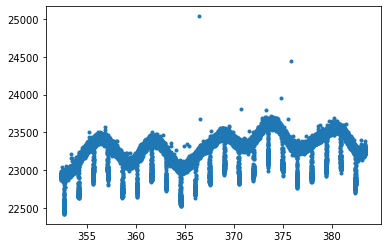

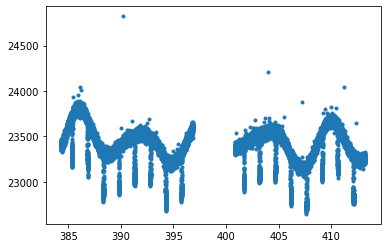

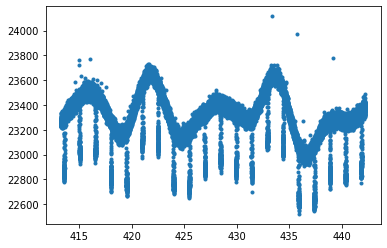

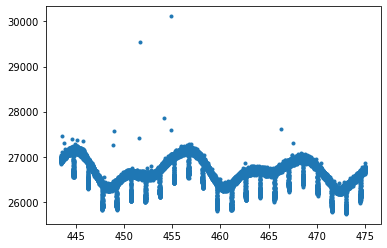

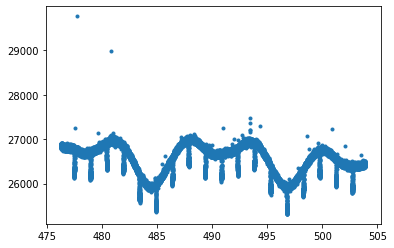

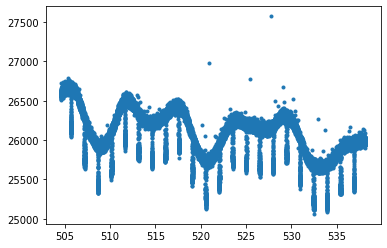

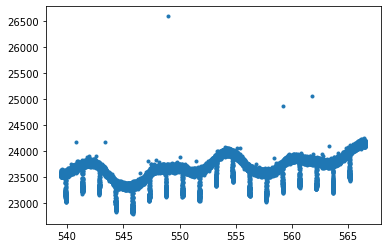

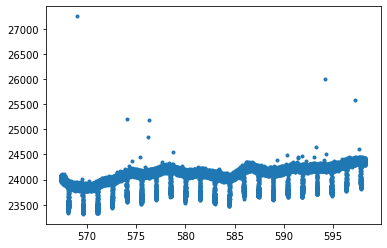

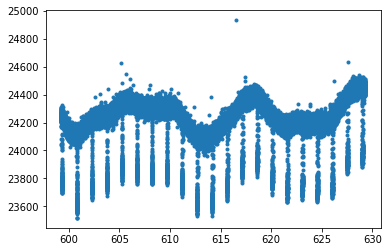

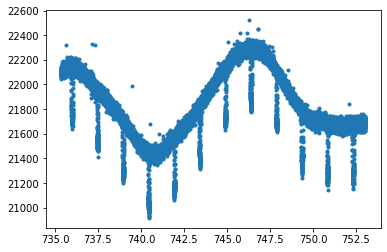

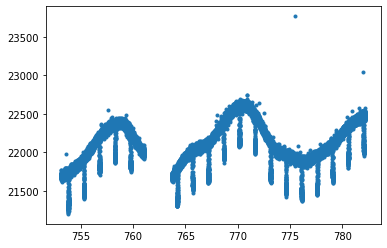

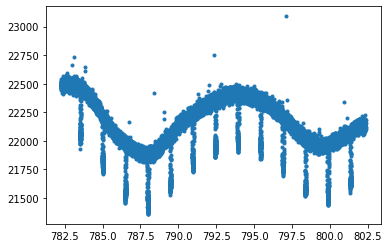

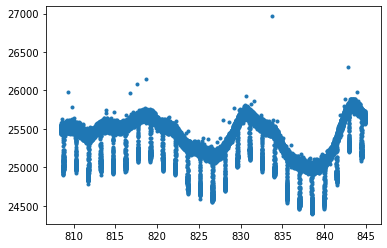

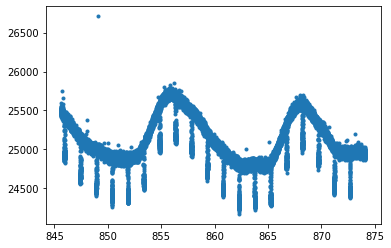

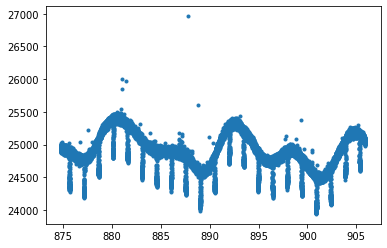

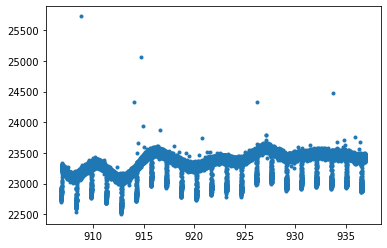

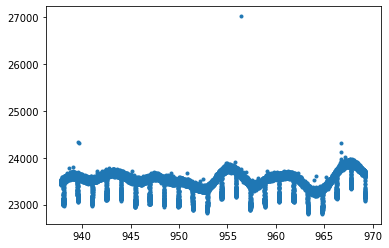

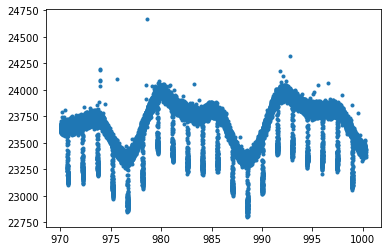

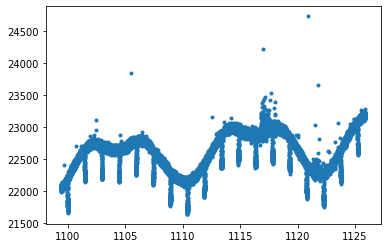

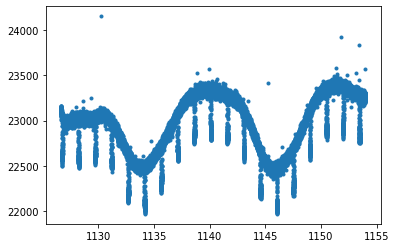

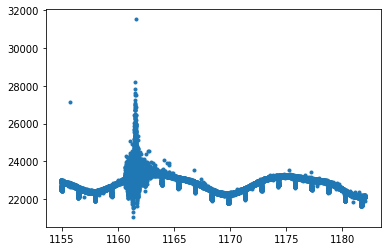

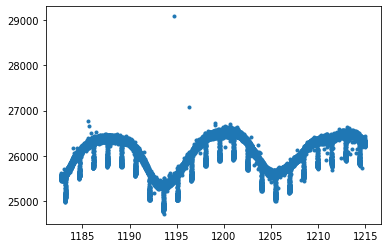

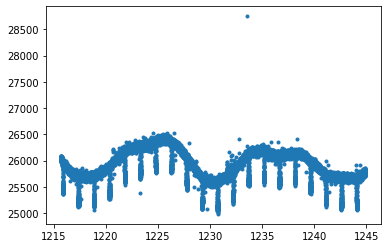

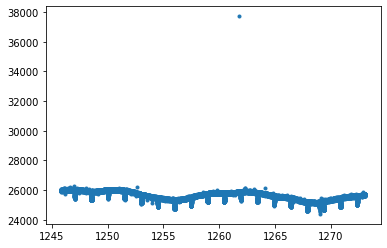

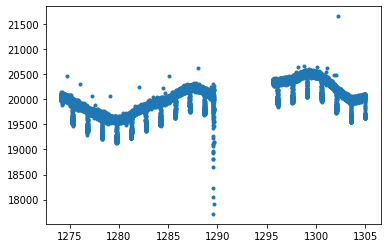

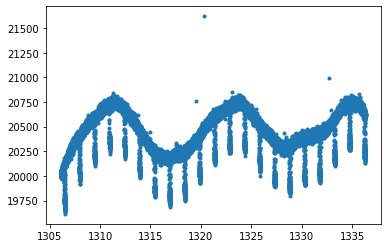

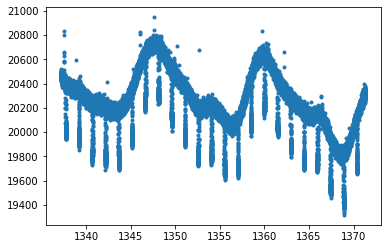

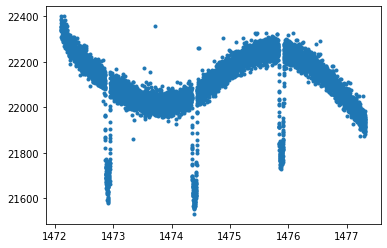

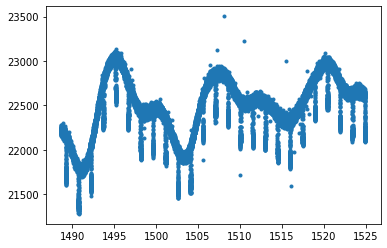

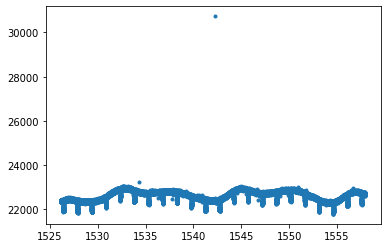

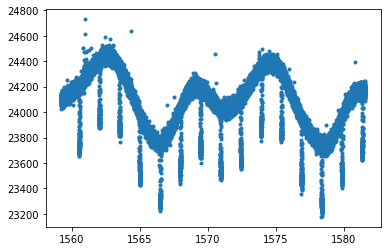

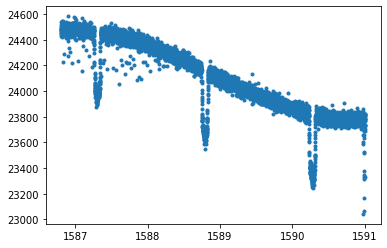

In [12]:
time_multi = []
pdcsap_flux_multi = []
for i,v in enumerate(fits_file):
    if 'slc' in v :
        fits_sc = '/sciproc/disk03/fiona/Kepler-17/mastDownload/Kepler/kplr010619192_sc_Q000033303330333032/'+str(v)
        data_fits_sc = pyfits.open(fits_sc)


        # first, time masknan
        masknan = ~np.isnan(data_fits_sc[1].data.field('TIME'))
        time=data_fits_sc[1].data.field('TIME')[masknan]
        sap_flux=data_fits_sc[1].data.field('SAP_FLUX')[masknan] # simplpe aperture photometry, light curve having some systematic error
        sap_flux_err=data_fits_sc[1].data.field('SAP_FLUX_ERR')[masknan]
        pdcsap_flux=data_fits_sc[1].data.field('PDCSAP_FLUX')[masknan] # preresearch data_fits_sc condition, light curve without systematic error
        pdcsap_flux_err=data_fits_sc[1].data.field('PDCSAP_FLUX_ERR')[masknan]
        sap_quality = data_fits_sc[1].data.field('SAP_QUALITY')[masknan]


        # time=time[sap_quality==0]
        # pdcsap_flux=pdcsap_flux[sap_quality==0]
        # pdcsap_flux_err=pdcsap_flux_err[sap_quality==0]
        # sap_flux=sap_flux[sap_quality==0]


        time1=time[~np.isnan(pdcsap_flux)]
        pdcsap_flux=pdcsap_flux[~np.isnan(pdcsap_flux)]
        pdcsap_flux_err=pdcsap_flux_err[~np.isnan(pdcsap_flux_err)]

        flux_dif = np.nanmedian(sap_flux) - np.nanmedian(pdcsap_flux)

        pdcsap_flux = pdcsap_flux + flux_dif
        
#         time_multi.append(time)
#         pdcsap_flux_multi.append(pdcsap_flux_multi)
        # pdcsap_flux = nor(pdcsap_flux)
        plt.plot(time, sap_flux,'.')
        plt.show()

In [13]:
time_multi = []
sap_flux_multi = []
pdcsap_flux_multi = []
for i,v in enumerate(fits_file):
    if 'slc' in v :
#         print(v)
        fits_sc = '/sciproc/disk03/fiona/Kepler-17/mastDownload/Kepler/kplr010619192_sc_Q000033303330333032/'+str(v)
        data_fits_sc = pyfits.open(fits_sc)


        # first, time masknan
        masknan = ~np.isnan(data_fits_sc[1].data.field('TIME'))
        time=data_fits_sc[1].data.field('TIME')[masknan]
        sap_flux=data_fits_sc[1].data.field('SAP_FLUX')[masknan] # simplpe aperture photometry, light curve having some systematic error
        sap_flux_err=data_fits_sc[1].data.field('SAP_FLUX_ERR')[masknan]
        pdcsap_flux=data_fits_sc[1].data.field('PDCSAP_FLUX')[masknan] # preresearch data_fits_sc condition, light curve without systematic error
        pdcsap_flux_err=data_fits_sc[1].data.field('PDCSAP_FLUX_ERR')[masknan]
        sap_quality = data_fits_sc[1].data.field('SAP_QUALITY')[masknan]


        # time=time[sap_quality==0]
        # pdcsap_flux=pdcsap_flux[sap_quality==0]
        # pdcsap_flux_err=pdcsap_flux_err[sap_quality==0]
        # sap_flux=sap_flux[sap_quality==0]


        time1=time[~np.isnan(pdcsap_flux)]
        pdcsap_flux=pdcsap_flux[~np.isnan(pdcsap_flux)]
        pdcsap_flux_err=pdcsap_flux_err[~np.isnan(pdcsap_flux_err)]

        flux_dif = np.nanmedian(sap_flux) - np.nanmedian(pdcsap_flux)

        pdcsap_flux = pdcsap_flux + flux_dif
        
#         time_multi.extend(time)
        time_multi.extend(time1)
        pdcsap_flux_multi.extend(pdcsap_flux)
        # pdcsap_flux = nor(pdcsap_flux)
#         plt.plot(time, sap_flux,'.')
#         plt.show()

In [68]:
# time_multi = list(time_multi)
# sap_flux_multi = list(sap_flux_multi)

In [14]:
time_multi = list(time_multi)
pdcsap_flux_multi = list(pdcsap_flux_multi)

In [15]:
len(time_multi),len(pdcsap_flux_multi)

(1266178, 1266178)

In [71]:
%matplotlib inline

In [18]:
sum(pdcsap_flux_multi)/len(pdcsap_flux_multi)

23711.406259253672

In [21]:
np.mean(pdcsap_flux_multi)# mean total flux

23711.402

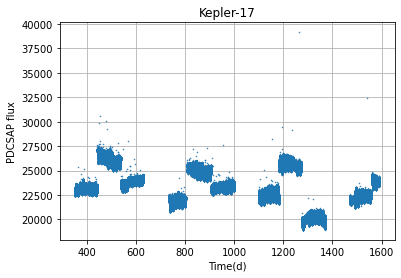

In [96]:
plt.plot(time_multi, pdcsap_flux_multi,'.',markersize=1)
plt.xlabel('Time(d)')
plt.ylabel("PDCSAP flux") # pds_flux

plt.title('Kepler-17')
# plt.savefig('sap_K17.png')
plt.grid()
plt.show()

# pdcsap quaters 

In [2]:
time_multi = []
sap_flux_multi = []
pdcsap_flux_multi = []
file_1 = ['kplr010619192-2010019161129_slc.fits','kplr010619192-2010049094358_slc.fits',\
          'kplr010619192-2010078100744_slc.fits']
for i,v in enumerate(file_1):
    if 'slc' in v :
#         print(v)
        fits_sc = '/sciproc/disk03/fiona/Kepler-17/mastDownload/Kepler/kplr010619192_sc_Q000033303330333032/'+str(v)
        data_fits_sc = pyfits.open(fits_sc)


        # first, time masknan
        masknan = ~np.isnan(data_fits_sc[1].data.field('TIME'))
        time=data_fits_sc[1].data.field('TIME')[masknan]
        sap_flux=data_fits_sc[1].data.field('SAP_FLUX')[masknan] # simplpe aperture photometry, light curve having some systematic error
        sap_flux_err=data_fits_sc[1].data.field('SAP_FLUX_ERR')[masknan]
        pdcsap_flux=data_fits_sc[1].data.field('PDCSAP_FLUX')[masknan] # preresearch data_fits_sc condition, light curve without systematic error
        pdcsap_flux_err=data_fits_sc[1].data.field('PDCSAP_FLUX_ERR')[masknan]
        sap_quality = data_fits_sc[1].data.field('SAP_QUALITY')[masknan]


        # time=time[sap_quality==0]
        # pdcsap_flux=pdcsap_flux[sap_quality==0]
        # pdcsap_flux_err=pdcsap_flux_err[sap_quality==0]
        # sap_flux=sap_flux[sap_quality==0]


        time1=time[~np.isnan(pdcsap_flux)]
        pdcsap_flux=pdcsap_flux[~np.isnan(pdcsap_flux)]
        pdcsap_flux_err=pdcsap_flux_err[~np.isnan(pdcsap_flux_err)]

        flux_dif = np.nanmedian(sap_flux) - np.nanmedian(pdcsap_flux)

        pdcsap_flux = pdcsap_flux + flux_dif
        
#         time_multi.extend(time)
        time_multi.extend(time1)
        pdcsap_flux_multi.extend(pdcsap_flux)
        # pdcsap_flux = nor(pdcsap_flux)
#         plt.plot(time, sap_flux,'.')
#         plt.show()

In [3]:
time_multi = list(time_multi)
pdcsap_flux_multi = list(pdcsap_flux_multi)

In [4]:
median_flux = sum(pdcsap_flux_multi)/len(pdcsap_flux_multi)

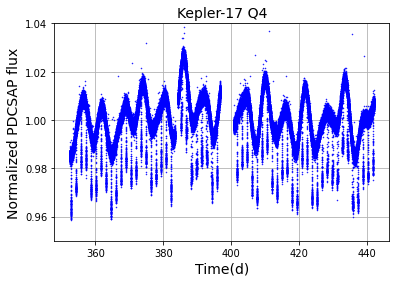

<Figure size 432x288 with 0 Axes>

In [11]:
plt.plot(time_multi, np.array(pdcsap_flux_multi)/median_flux,'b.',markersize=1)
plt.xlabel('Time(d)',fontsize=14)
plt.ylabel("Normalized PDCSAP flux",fontsize=14) # pds_flux

plt.title('Kepler-17 Q4',fontsize = 14)

plt.ylim(0.95,1.04)
plt.grid()
plt.savefig('pdcsap_K17_Q4.eps',format = 'eps',bbox_inches='tight')
plt.savefig('pdcsap_K17_Q4.png',format = 'png',bbox_inches='tight')
plt.show()

plt.clf()

In [10]:
file_1 = ['2010019161129_slc_','2010049094358_slc_','2010078100744_slc_']
# a = np.linspace(0,20,21)
# b = np.linspace(21,36,36-21+1)
# c = np.linspace(37,56,56-37+1)
# print(b)
file_NO = np.linspace(0,56,57)
file_pdc = []
for i_pdc in file_NO:
    if i_pdc <= 20:
        txt = file_1[0]+str(int(i_pdc))+'.txt'
    elif 21 <= i_pdc <= 36:
        txt = file_1[1]+str(int(i_pdc))+'.txt'
    else:
        txt = file_1[2]+str(int(i_pdc))+'.txt'
    
    file_pdc.append(txt)

print(file_pdc)

['2010019161129_slc_0.txt', '2010019161129_slc_1.txt', '2010019161129_slc_2.txt', '2010019161129_slc_3.txt', '2010019161129_slc_4.txt', '2010019161129_slc_5.txt', '2010019161129_slc_6.txt', '2010019161129_slc_7.txt', '2010019161129_slc_8.txt', '2010019161129_slc_9.txt', '2010019161129_slc_10.txt', '2010019161129_slc_11.txt', '2010019161129_slc_12.txt', '2010019161129_slc_13.txt', '2010019161129_slc_14.txt', '2010019161129_slc_15.txt', '2010019161129_slc_16.txt', '2010019161129_slc_17.txt', '2010019161129_slc_18.txt', '2010019161129_slc_19.txt', '2010019161129_slc_20.txt', '2010049094358_slc_21.txt', '2010049094358_slc_22.txt', '2010049094358_slc_23.txt', '2010049094358_slc_24.txt', '2010049094358_slc_25.txt', '2010049094358_slc_26.txt', '2010049094358_slc_27.txt', '2010049094358_slc_28.txt', '2010049094358_slc_29.txt', '2010049094358_slc_30.txt', '2010049094358_slc_31.txt', '2010049094358_slc_32.txt', '2010049094358_slc_33.txt', '2010049094358_slc_34.txt', '2010049094358_slc_35.txt', '

In [59]:
%matplotlib notebook

<IPython.core.display.Javascript object>


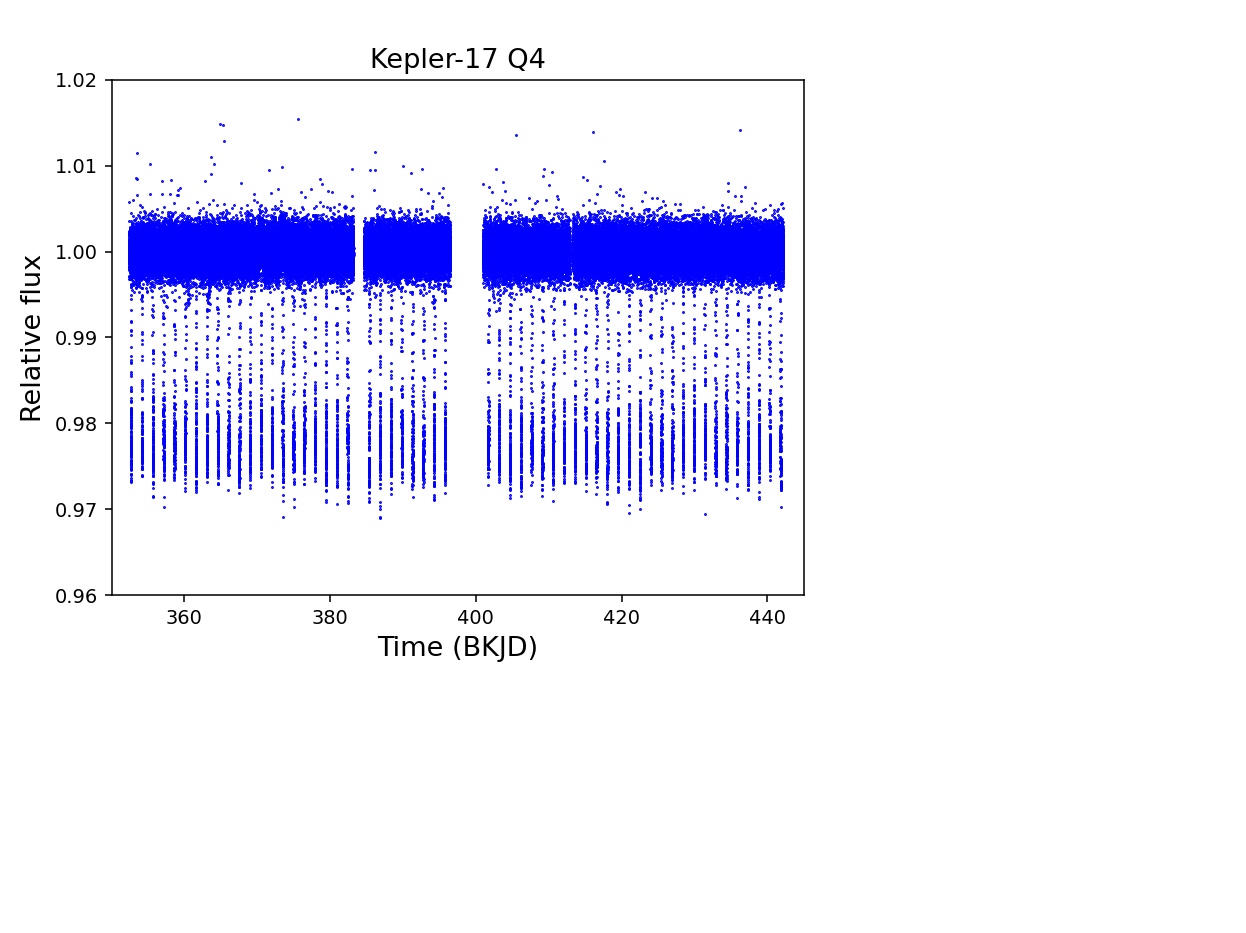

In [60]:
# tot_time = []
# tot_flux = []
for i_file, v_file in enumerate(file_pdc):
    data_pdc = np.loadtxt(v_file)
    pdc_time = data_pdc[:,0]
    pdc_flux = data_pdc[:,1]
    plt.plot(pdc_time,pdc_flux,'b.',markersize='1')
    
#     tot_time.append(pdc_time)
#     tot_flux.append(pdc_flux)
    
# plt.plot(tot_time,tot_flux)
plt.ylim(0.96,1.02)
plt.xlim(350,445)
plt.xlabel('Time (BKJD)',fontsize=14)
plt.ylabel('Relative flux',fontsize=14)
plt.title('Kepler-17 Q4',fontsize=14)
plt.show()

In [15]:
len(tot_time),len(tot_flux)

(57, 57)

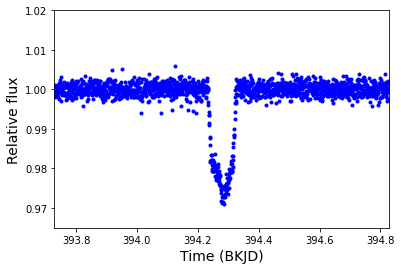

In [51]:
tot_time = []
tot_flux = []
for i_file, v_file in enumerate(file_pdc):
    data_pdc = np.loadtxt(v_file)
    pdc_time = data_pdc[:,0]
    pdc_flux = data_pdc[:,1]
    tot_time.append(pdc_time)
    tot_flux.append(pdc_flux)
    
plt.plot(tot_time[27],tot_flux[27],'.',color='b')
plt.xlim(393.729,394.829)
plt.ylim(0.965,1.02)
plt.xlabel('Time (BKJD)',fontsize=14)
plt.ylabel('Relative flux',fontsize=14)
# plt.title('Kepler-71 Q6',fontsize=14)
plt.show()

In [50]:
394.2790-1.10/2,394.2790+1.10/2

(393.729, 394.829)